# CarND-Behavioral-Cloning-P3

## Analyse and Visualisation of the Trainingdata

-----
## I. Import of the Dependencies

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import time
import shutil
import os
import random
import cv2
import math
import json
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

import keras
from keras.preprocessing.image import *
from keras.models import Sequential, Model
from keras.layers import Convolution2D, Flatten, Lambda, MaxPooling2D, Cropping2D, AveragePooling2D,BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import Callback
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from IPython.display import display # Allows the use of display() for DataFrames

from utils import *
from network import *
from generator import *
# Visualizations will be shown in the notebook.
%matplotlib inline

-----
## II. Inspecting data

In [12]:
data_dir = 'data'
data = loadData(data_dir)
data.iloc[:5]

Dataset Columns: ['center', 'left', 'right', 'steering_angle', 'throttle', 'brake', 'speed']


,center,left,right,steering_angle,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [13]:
print("Data loaded...")
print("Shape of the dataset:", data.shape, "\n")
print(data.describe(), "\n")

Data loaded...
Shape of the dataset: (8036, 7) 

       steering_angle     throttle        brake        speed
count     8036.000000  8036.000000  8036.000000  8036.000000
mean         0.004070     0.869660     0.001970    28.169839
std          0.128840     0.301326     0.036565     6.149327
min         -0.942695     0.000000     0.000000     0.502490
25%          0.000000     0.985533     0.000000    30.183093
50%          0.000000     0.985533     0.000000    30.186400
75%          0.000000     0.985533     0.000000    30.186640
max          1.000000     0.985533     1.000000    30.709360 



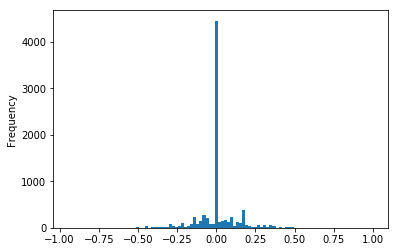

In [14]:
data['steering_angle'].plot.hist(bins=100)

In [15]:
data_train, data_val = train_test_split(data, test_size=0.2)

In [16]:
# Number of training examples
n_train = len(data_train)

# Number of testing examples.
n_val = len(data_val)

print("Number of train images =", n_train)
print("Number of n_val labels =", n_val)

Number of train images = 6428
Number of n_val labels = 1608


## III. Preprozessing Trainimages

### 0. Original Image 

(160, 320, 3)


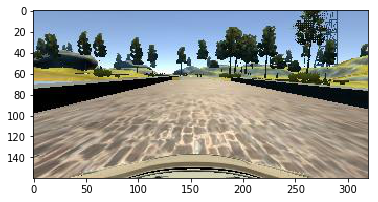

In [17]:
def read_image(file):
    # Readimage from file
    image = plt.imread('data/' + file)
    return image

def showImage(image):
    plt.imshow(image.squeeze())
    plt.show()

image = read_image(data['center'][0].strip())
print(image.shape)

showImage(image) 

### 1. Flip Images

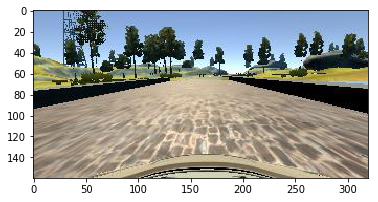

In [18]:
fliped, steering_angle = random_flip(image,0.1)
showImage(fliped)

### 2. Random change of brightness 

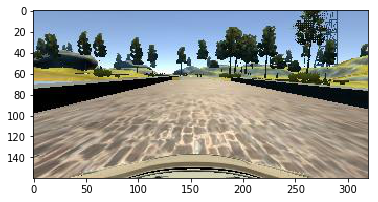

In [19]:
brightness = random_brightness(image)
showImage(brightness)

### 3. Random sharing

steering_angle: 0.1


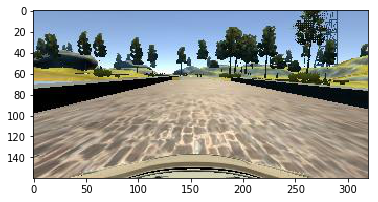

In [20]:
shear, steering_angle = random_shear(image, 0.1)
print('steering_angle: ' + str(steering_angle))    
showImage(shear)

### 4. Random shadowing

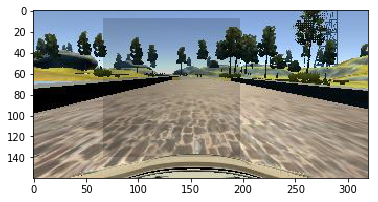

In [21]:
shadow = random_shadow(image)
showImage(shadow)

### 5. Run Pipeline

steering_angle: -0.9069155614759092


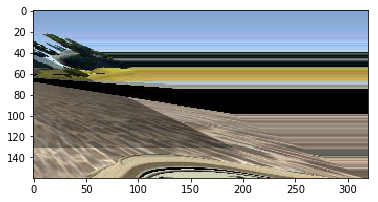

In [22]:
pipelined, steering_angle = pipeline(image,steering_angle)
print('steering_angle: ' + str(steering_angle))    
showImage(pipelined)

-----
## VI. Model Architectur

In [23]:
model = nvidia_model(True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Crop2D (Cropping2D)          (None, 55, 318, 3)        0         
_________________________________________________________________
Normalise (BatchNormalizatio (None, 55, 318, 3)        220       
_________________________________________________________________
Conv1 (Conv2D)               (None, 27, 158, 24)       672       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 13, 79, 24)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 77, 48)        10416     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 5, 38, 48)         0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 36, 72)         31176     
__________

-----
## V. Datagenerator

### 1. Validationdata Generator

steering angle: [ 0.3]


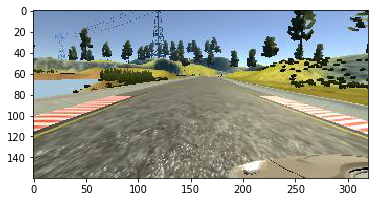

In [24]:
gen = generator( data_val, batch_size=1)        
x, y = next( gen )
print('steering angle: ' + str(y))   
showImage( x[0] ) 

### 2. Traindata Generator

steering angle: [-0.]


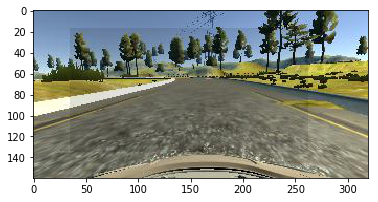

In [15]:
gen = generator( data_val, batch_size=1, augment=True)        
x, y = next( gen )
print('steering angle: ' + str(y))     
showImage( x[0] ) 


In [16]:
from keras.models import load_model
model = load_model('model.h5')

In [17]:
image_array = np.asarray(x[0])
steering_angle = float(model.predict(image_array[None, :, :, :], batch_size=1))
print(steering_angle)
print(y[0])

image_array = np.asarray(x[0])
steering_angle = float(model.predict(image_array[None, :, :, :], batch_size=1))
print(steering_angle)
print(y[0])

0.08621082454919815
-0.0
0.08621082454919815
-0.0


In [18]:
# visualize model layers output

from keras import backend as K

def plotLayer(image, layer, factors = [9,8], figsize=(60,40)):

    layerOutput = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer].output])
    # output in test mode = 0, train mode = 1
    layerOutputSample = layerOutput([image.reshape(1,image.shape[0],image.shape[1],image.shape[2]), 1])[0]
    layerOutputSample = layerOutputSample.reshape(layerOutputSample.shape[1],layerOutputSample.shape[2],layerOutputSample.shape[3])
    print(layerOutputSample.shape)
    figure = plt.figure(figsize=figsize)
    for ind in range(layerOutputSample.shape[2]):
        plt.subplot(factors[0],factors[1],ind + 1)
        val = layerOutputSample[:,:,ind]
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')
    plt.tight_layout()   


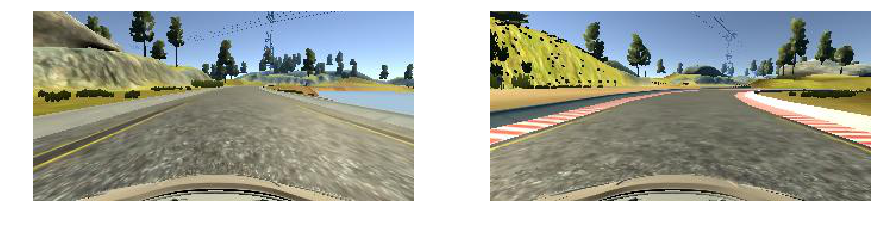

In [19]:
gen = generator( data_val, batch_size=1)  
x, y = next( gen )

plt.figure(figsize=(15, 10))

image_array_1 = np.asarray(x[0])
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image_array_1)

gen = generator( data_val, batch_size=1)        
x, y = next( gen )
image_array_2 = np.asarray(x[0])
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(image_array_2)

plt.show()

(27, 39, 24)


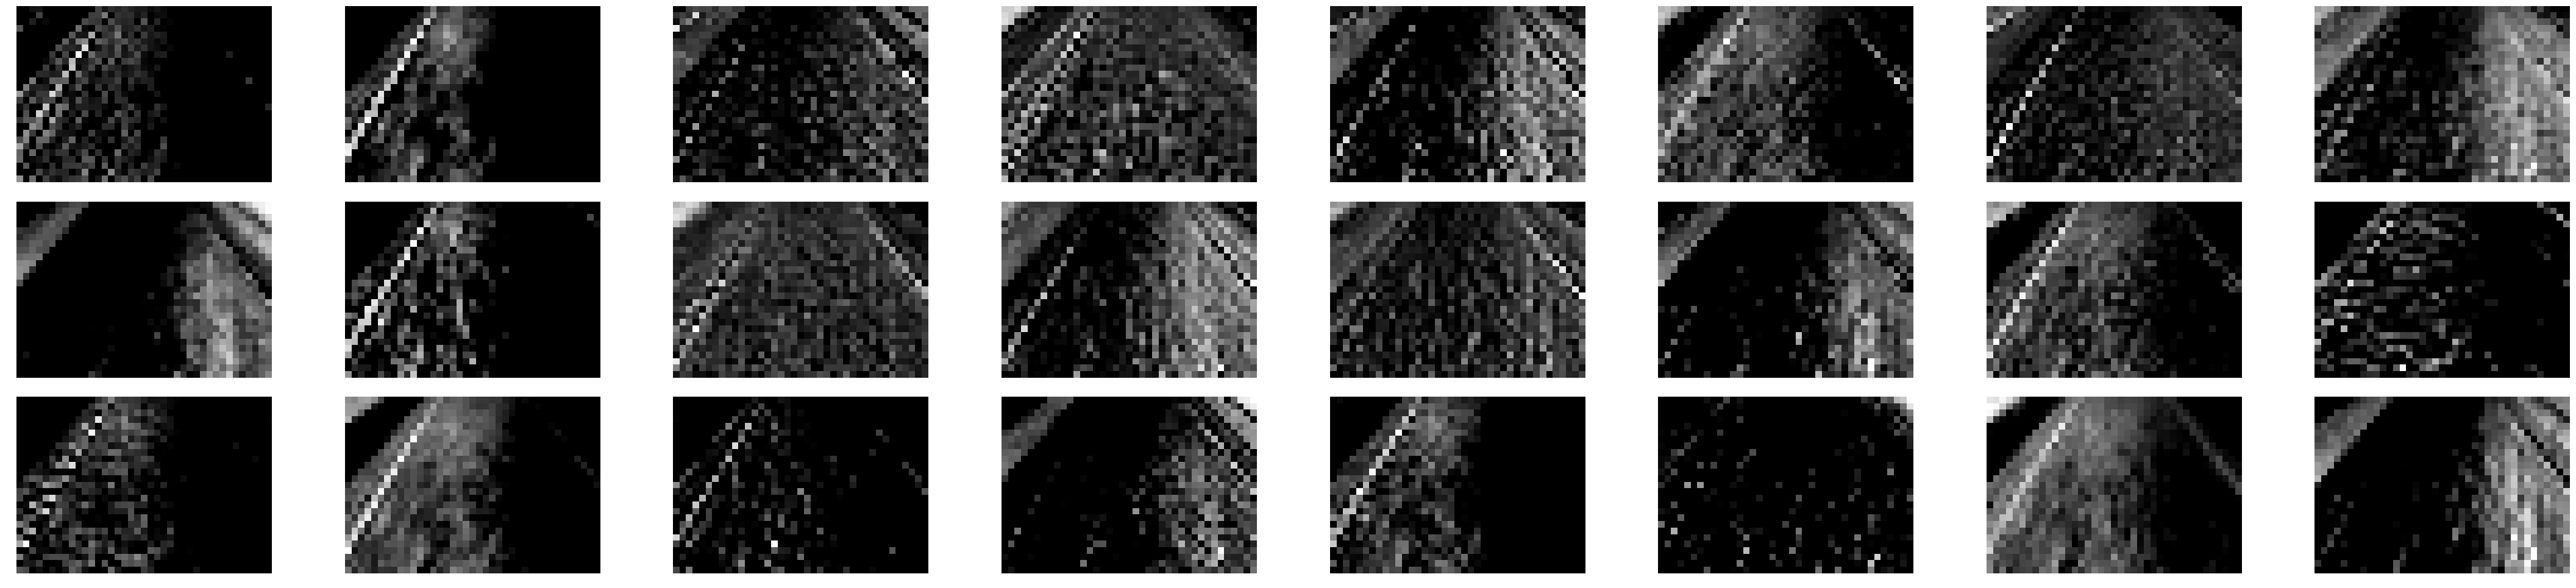

In [20]:
plotLayer(image_array_1, 3)

(27, 39, 24)


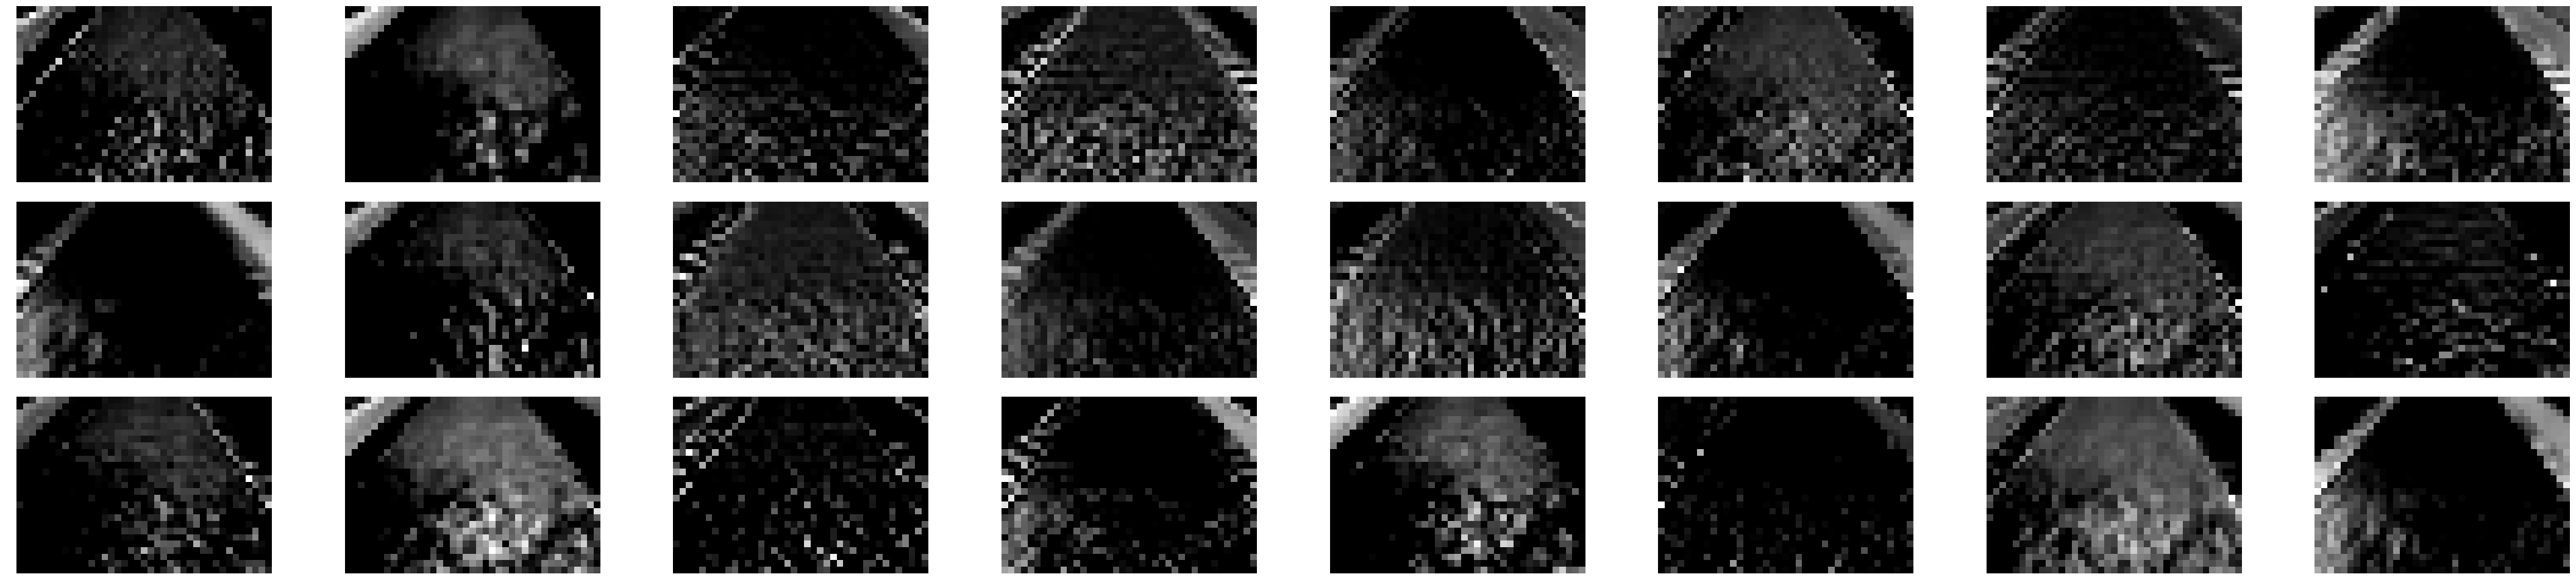

In [21]:
plotLayer(image_array_2, 3)

(11, 17, 48)


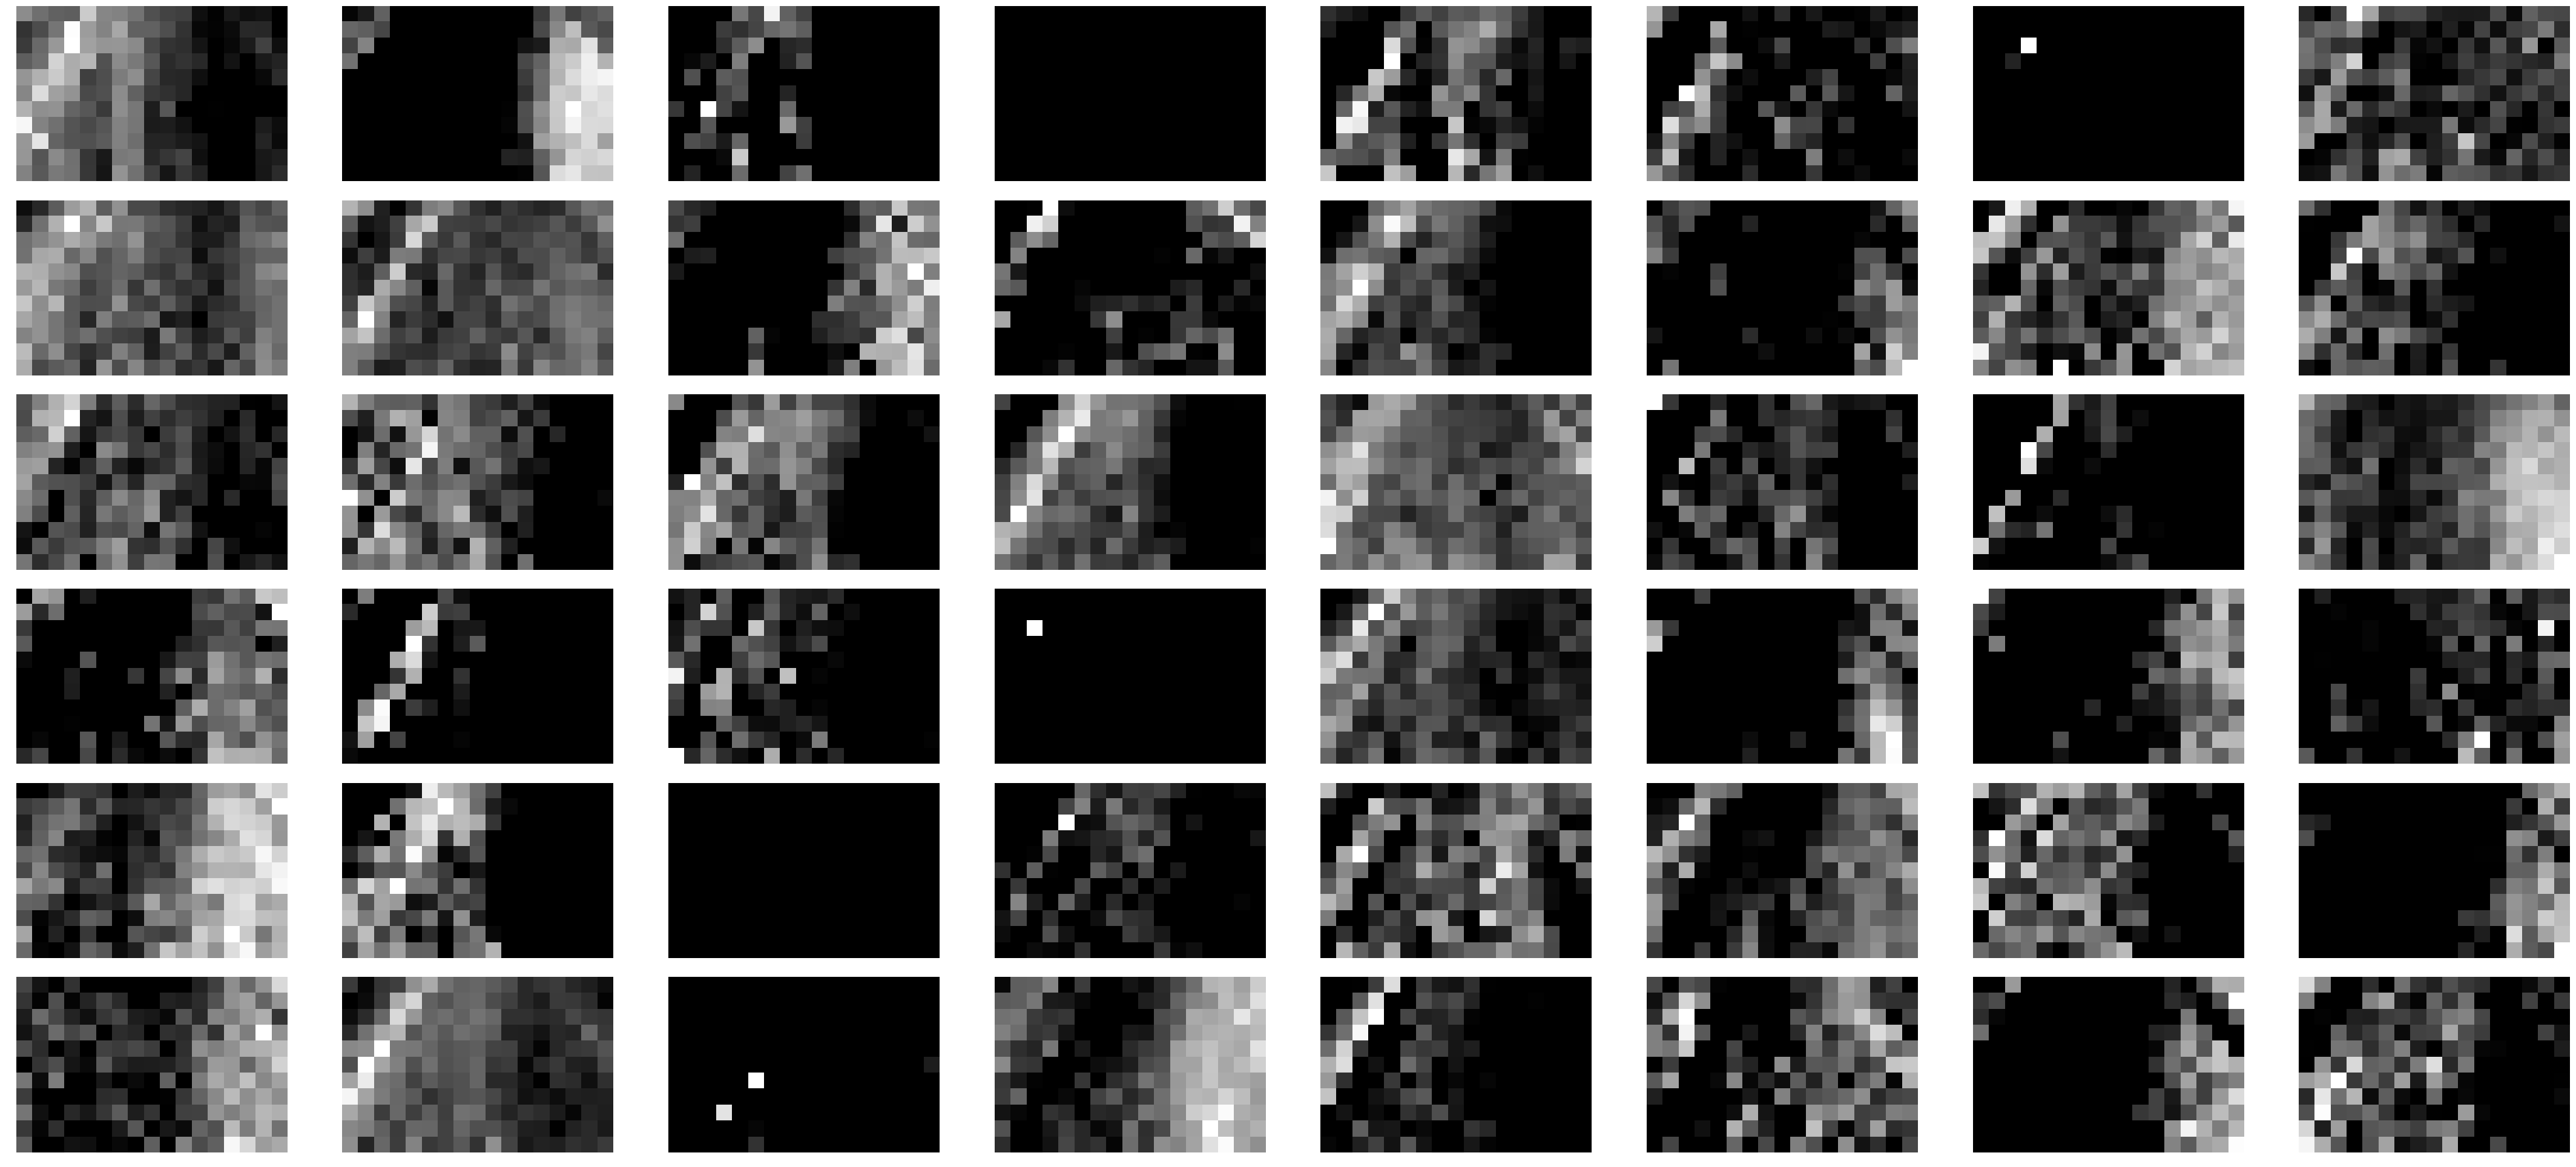

In [22]:
plotLayer(image_array_1, 5)

(11, 17, 48)


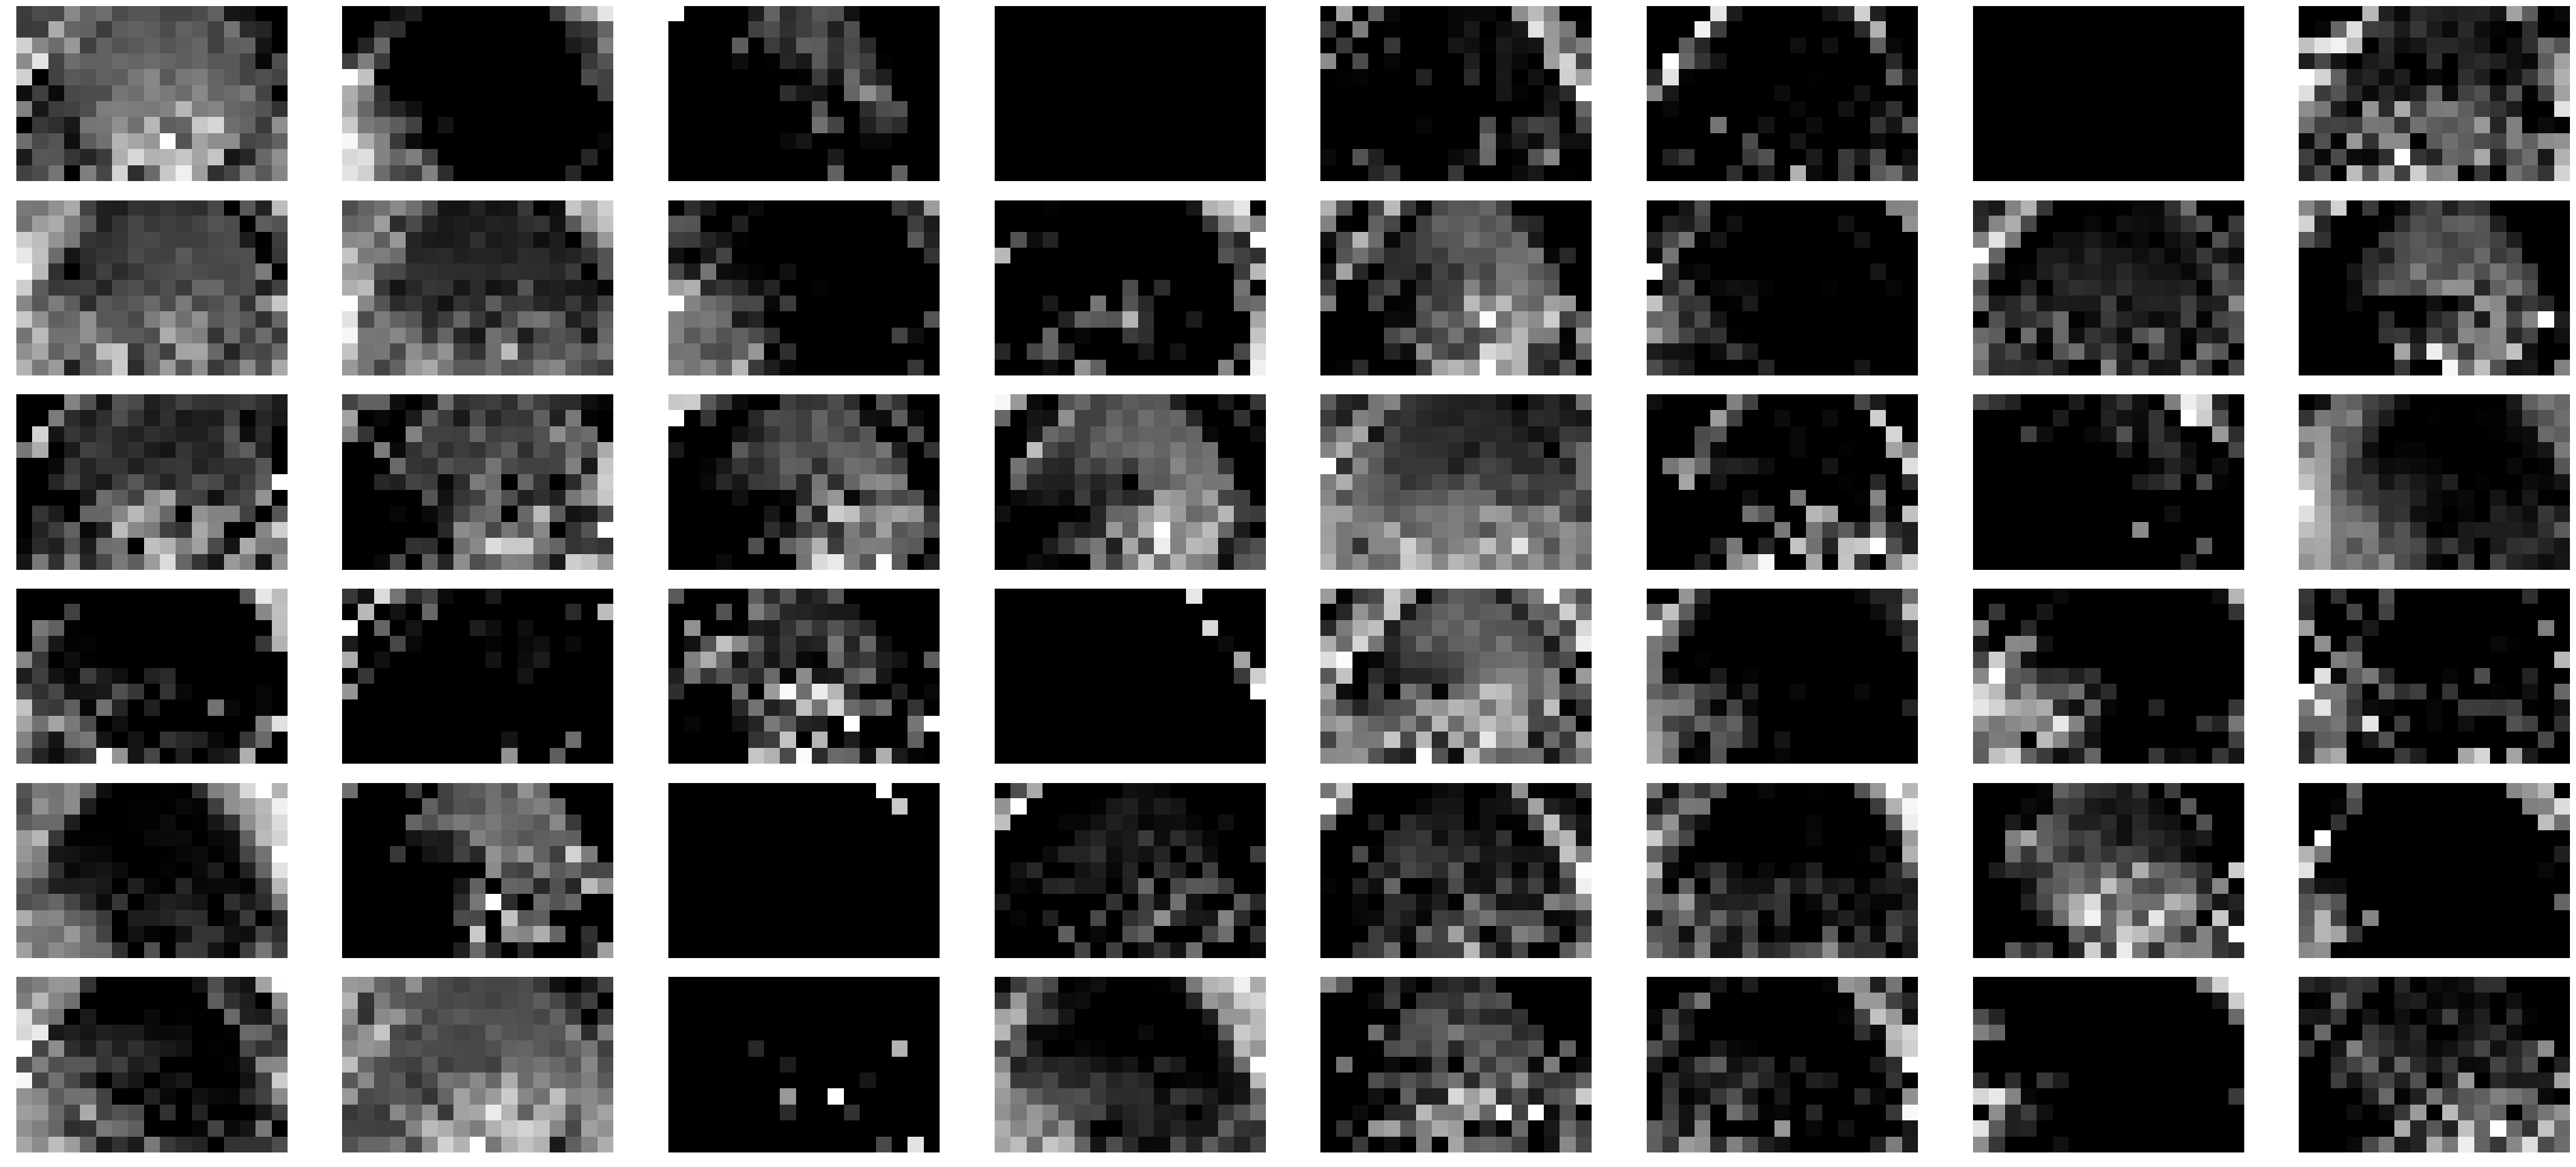

In [23]:
plotLayer(image_array_2, 5)

(3, 6, 72)


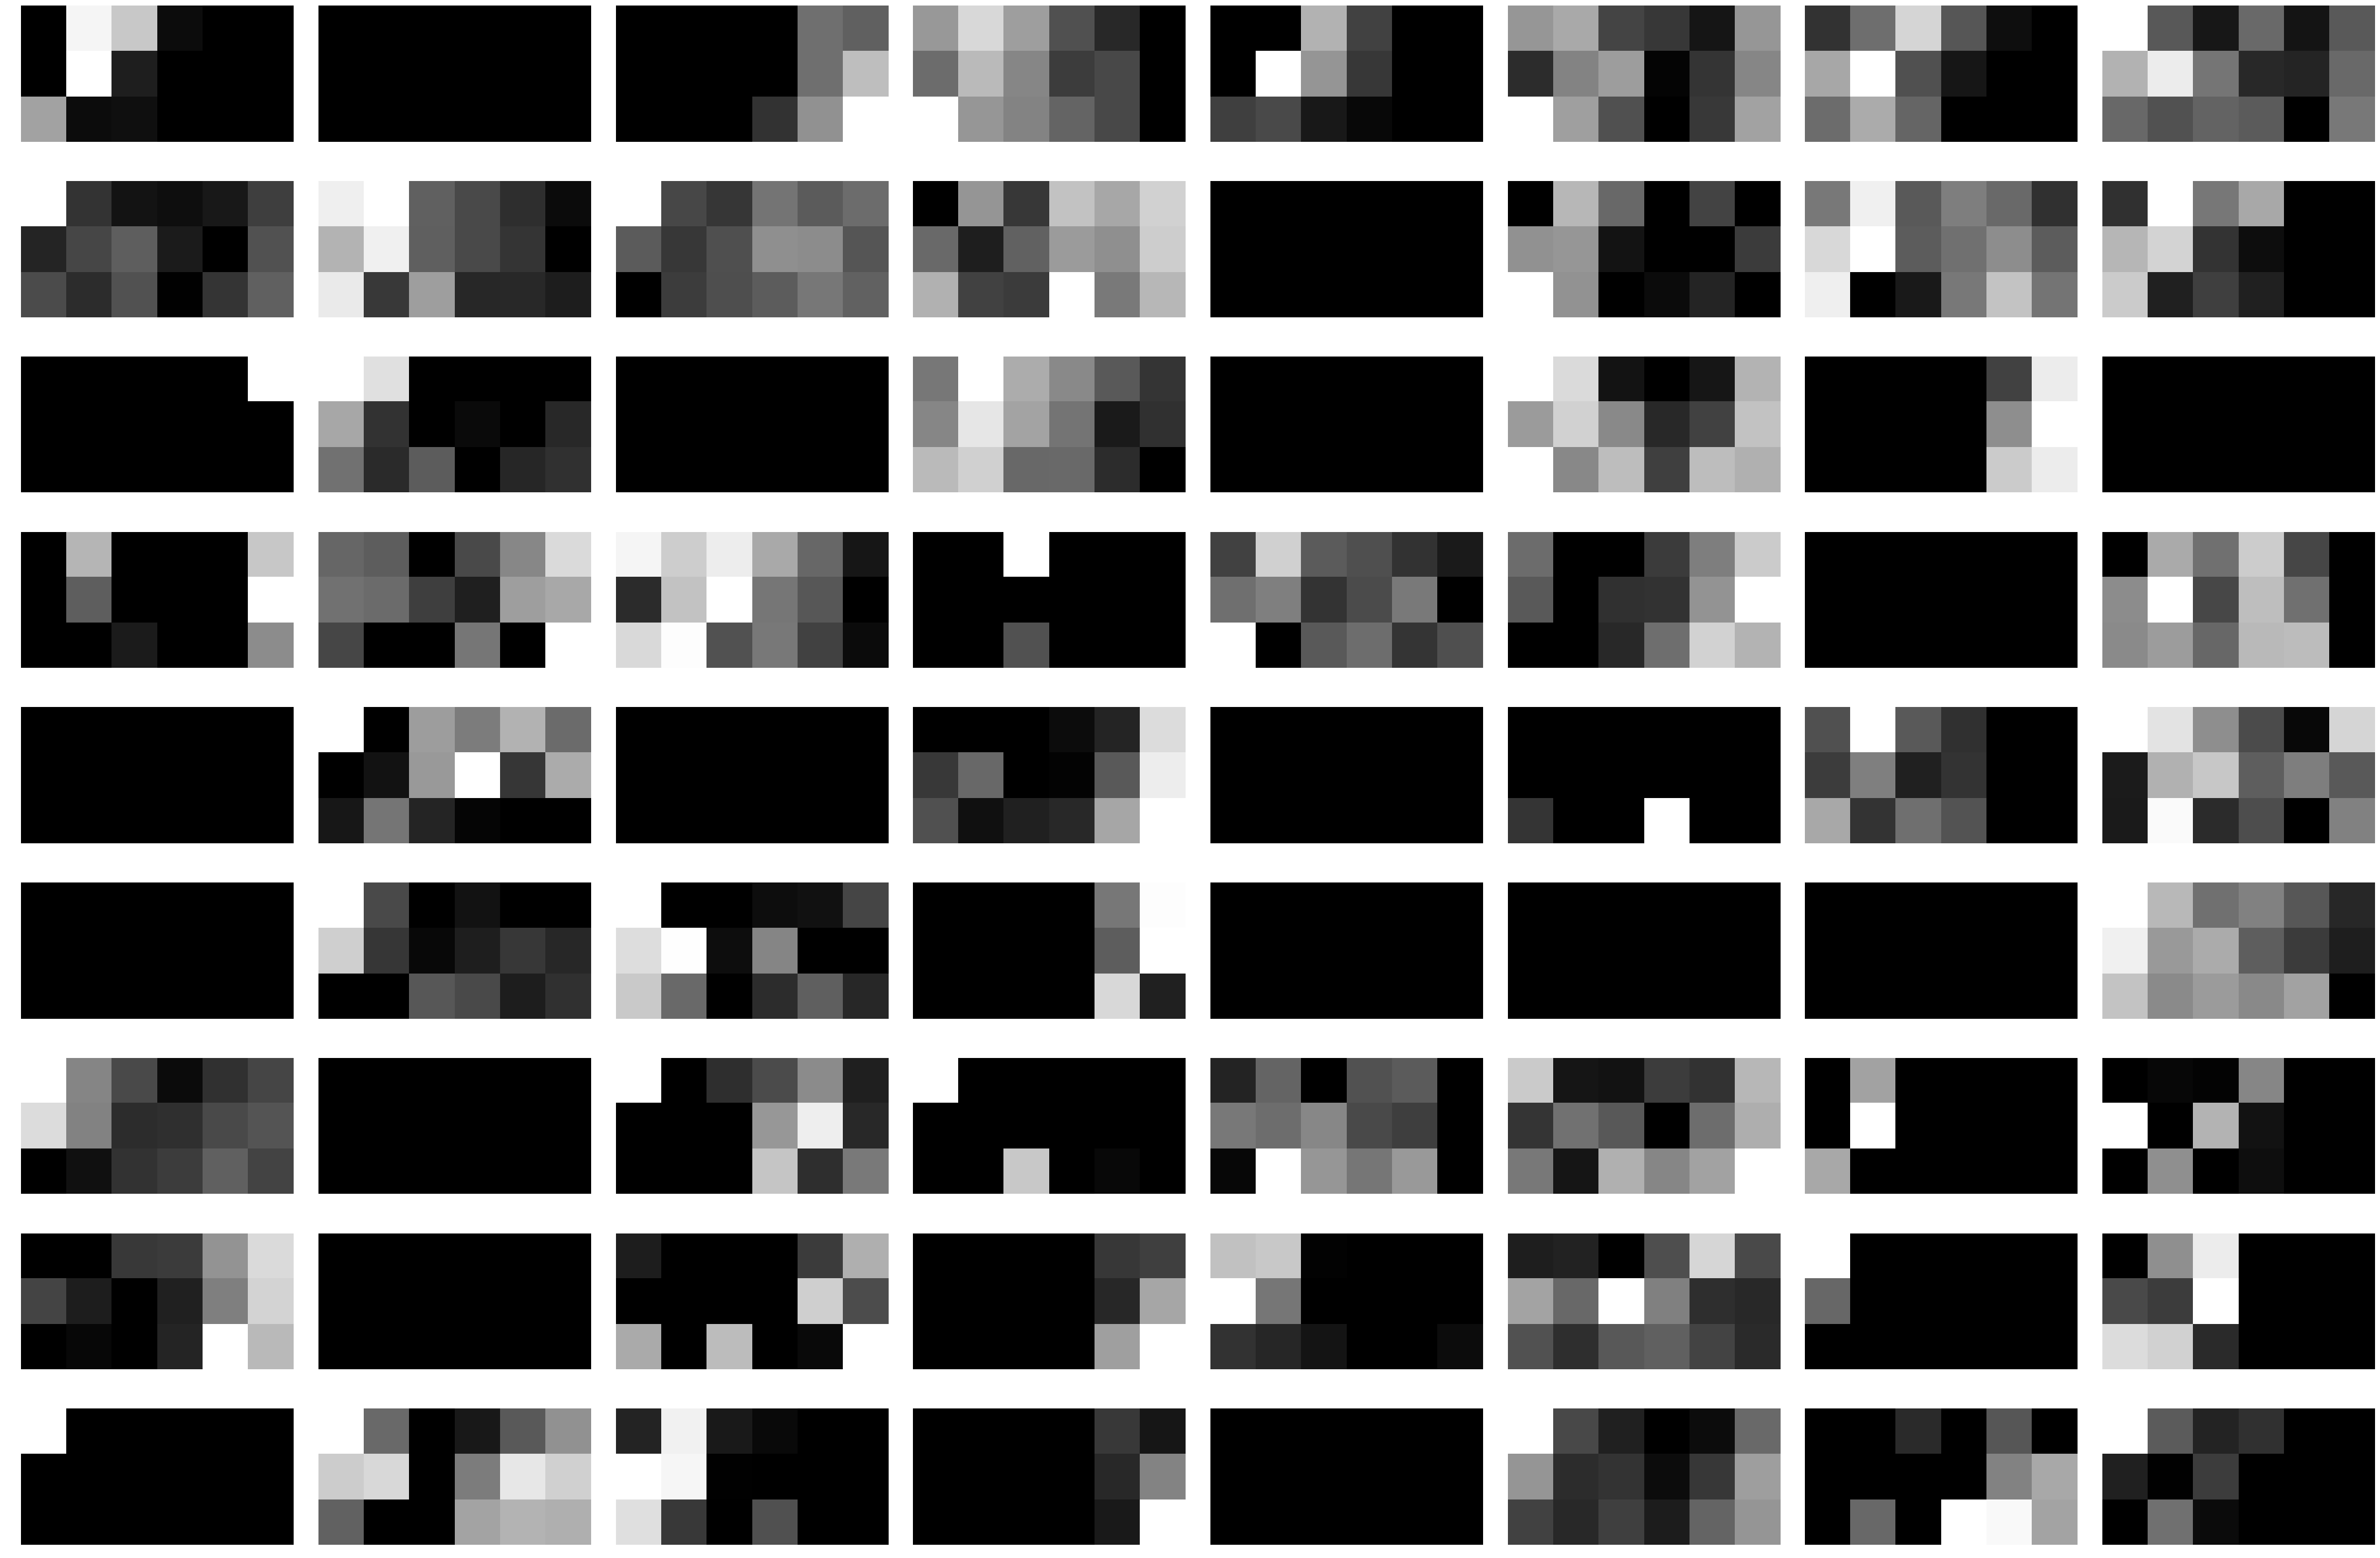

In [24]:
plotLayer(image_array_1, 7)

(3, 6, 72)


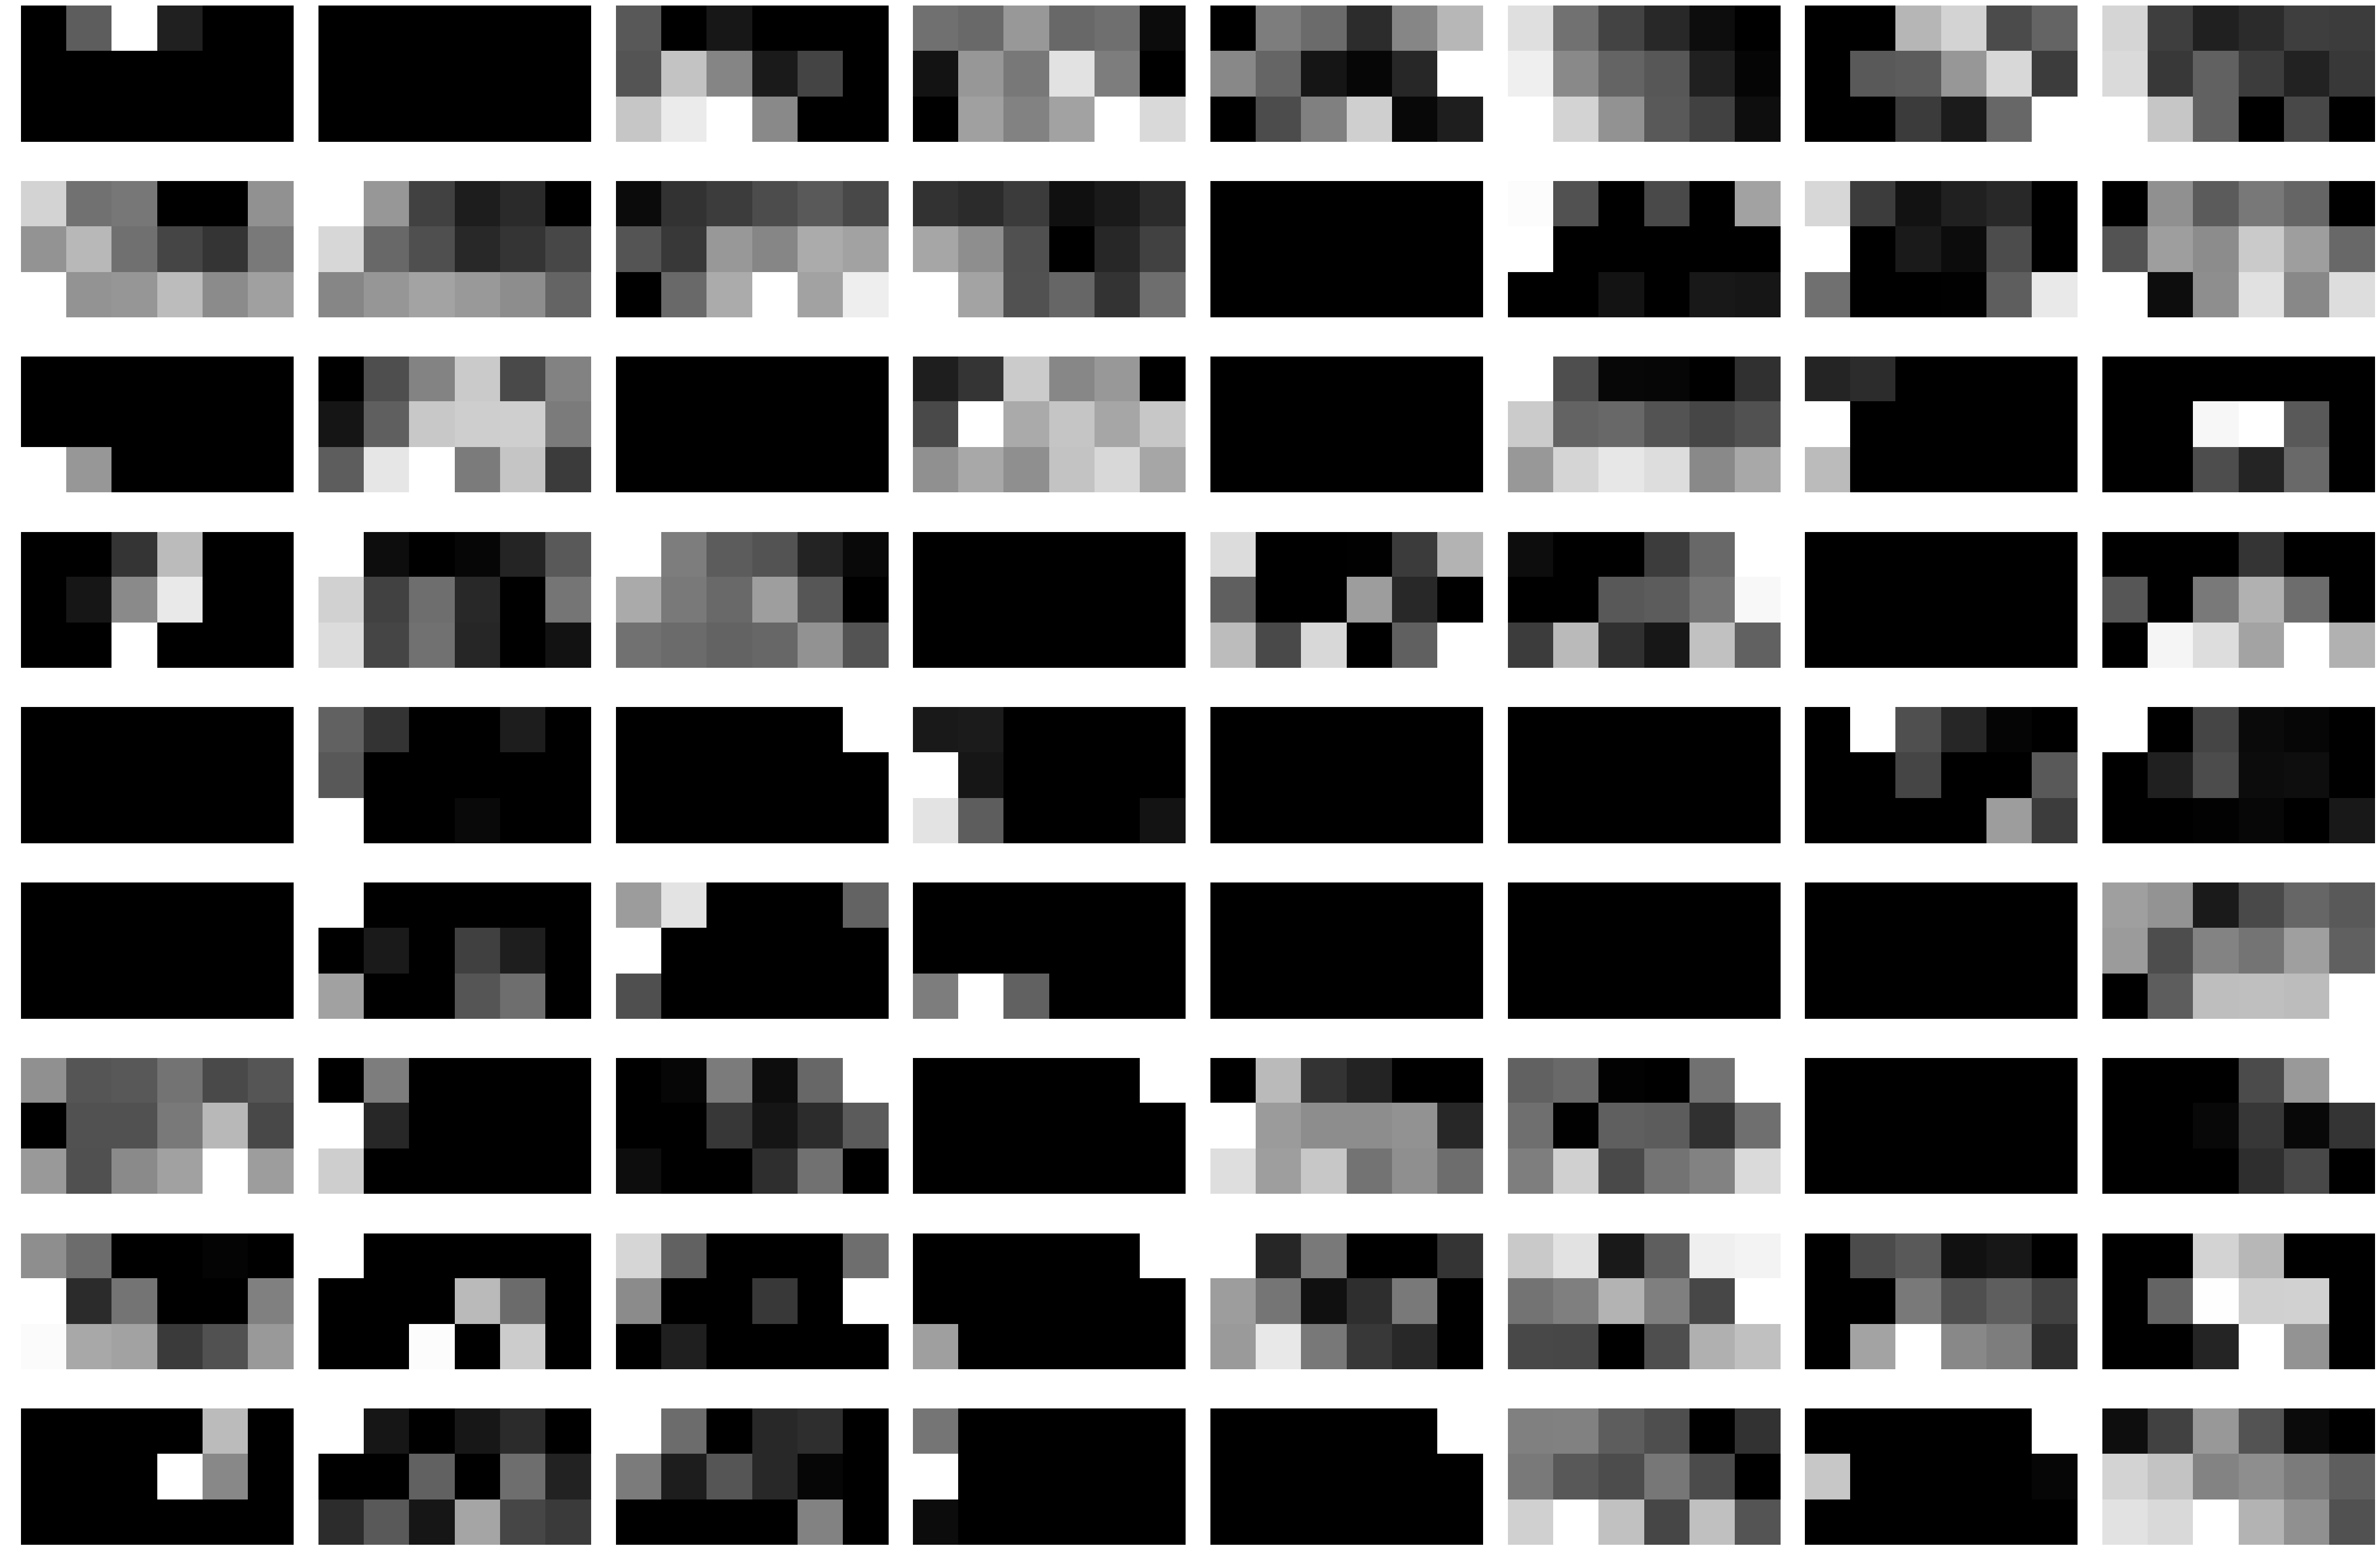

In [25]:
plotLayer(image_array_2, 7)